In [6]:
import pandas as pd
import numpy as np

### 1. Đọc file CSV 

In [7]:
df = pd.read_csv("../data/IMDB_Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### 2. Các thông tin về dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Dữ liệu không có dữ liệu nào có giá trị NULL

In [9]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Trong data có 50000 giá trị, có 49582 giá trị không trùng lặp tứ có 418 giá trị review bị trùng lặp

In [10]:
# Xem nội dung bên trong một cách đấy đủ để lên phương án cho bước làm sách dữ liệu
pd.set_option('display.max_colwidth', None)
df.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive


### 3. Làm sạch dữ liệu


Có thể thấy trong phần bình luận có chứa các element của html như ```<br>, <br/>```, có tồn lại trùng lặp, gồm cả chữ hoa và chữ thường, các kỹ tự đặc biệt.

Vậy các việc ta cần xử lý như sau:
- Xóa bỏ các bình luận bị trùng lặp.
- Xử lý phần review xóa các phần tử html.
- Xử lý đưa hết chữ hòa về chữ thường.
- Xóa bỏ các ký tự đặc biệt.
- Xóa stopwords - stopwords là những từ rất phổ biến trong ngôn ngữ nhưng không mang nhiều ý nghĩa trong việc phân tích văn bản. Stopwords xuất hiện nhiều nhưng không giúp gì cho việc phân tích ý nghĩa. Xóa đi cho mô hình đỡ bị nhiễu, hơn nữa còn giảm số chiều của dữ liệu, tăng tốc độ học.
- Stemming -  Stemming là quá trình chuyển một từ về gốc của nó, bằng cách cắt bỏ các hậu tố như -ing, -ed, -s. Ví dụ running về run.


In [11]:
# Xóa các review trùng lặp
def count_dup(df):
    return df.duplicated(subset='review').sum()

def remove_dup_reviews(df):
    print("Trước khi xóa:", len(df), "dòng")
    print("Dòng trùng:", count_dup(df), "dòng")
    df_cleaned = df.drop_duplicates(subset='review', keep='first').reset_index(drop=True)
    print("Sau khi xóa:", len(df_cleaned), "dòng")
    return df_cleaned

df = remove_dup_reviews(df)

Trước khi xóa: 50000 dòng
Dòng trùng: 418 dòng
Sau khi xóa: 49582 dòng


In [12]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
freq,1,24884


In [13]:
# Xóa các phần tử html trong review
def remove_html_review(text):
    html_tags = ['<br>', '<br/>', '<br />', '<p>', '</p>', '&nbsp;', '&amp;']
    for tag in html_tags:
        text = text.replace(tag, ' ')
    return ' '.join(text.split()) 

df['review'] = df['review'].apply(remove_html_review)

In [14]:
pd.set_option('display.max_colwidth', None)
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love. This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman. This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time. This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie. OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! A

In [15]:
# Đưa chữ hoa về chữ thường
df['review'] = df['review'].str.lower()

df.head()

,review,sentiment
0,"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me. the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word. it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn't mess around. the first episode i ever saw struck me as so nasty it was surreal, i couldn't say i was ready for it, but as i watched more, i developed a taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only ""has got all the polari"" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.",positive
2,"i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love. this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman. this may not be the crown jewel of his career, but it was wittier than ""devil wears prada"" and more interesting than ""superman"" a great comedy to go see with friends.",positive
3,"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time. this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie. ok, first of all when you're going to make a film you must decide if its a thriller or a drama! a

In [16]:
# Xóa ký tụ đặc biệt
def remove_special_characters(text):
    result = ""
    for char in text:
        if char.isalnum() or char.isspace():
            result += char
    return result

df['review'] = df['review'].apply(remove_special_characters)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,positive
1,a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,positive
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,positive
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all t

In [17]:
# Xử lý xóa các stopword
import nltk 
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dodan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = []

    for word in words:
        if word not in stop_words:
            filtered_words.append(word)

    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

df['review'] = df['review'].apply(remove_stopwords)

df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewingthats get touch darker side,positive
1,wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown love id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends,positive
3,basically theres family little boy jake thinks theres zombie closet parents fighting time movie slower soap opera suddenly jake decides become rambo kill zombie ok first youre going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots 3 10 well playing parents descent dialogs shots jake ignore,negative
4,petter matteis love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzlers play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter acting good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive wish mr mattei good luck await anxiously next work,positive


In [19]:
# Xử lý Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def apply_stemming(text):
    stemmer = PorterStemmer()
    words = text.split()
    stemmed_words = []

    for word in words:
        stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)

    result = ' '.join(stemmed_words)
    return result

df['review'] = df['review'].apply(apply_stemming)

df.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingthat get touch darker side,positive
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done,positive
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point 2 risk addict thought proof woodi allen still fulli control style mani us grown love id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young woman may crown jewel career wittier devil wear prada interest superman great comedi go see friend,positive
3,basic there famili littl boy jake think there zombi closet parent fight time movi slower soap opera suddenli jake decid becom rambo kill zombi ok first your go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot 3 10 well play parent descent dialog shot jake ignor,negative
4,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peopl live world live habitat thing one get soul pictur differ stage loneli one inhabit big citi exactli best place human relat find sincer fulfil one discern case peopl encount act good mr mattei direct steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talent cast make charact come aliv wish mr mattei good luck await anxious next work,positive


In [29]:
# lưu file đã làm sạch 
def save_cleaned_reviews(df, output_path='../output/data_cleaned.csv'):
    try:
        cleaned_df = df[['review', 'sentiment']]
        cleaned_df.to_csv(output_path, index=False, encoding='utf-8')
        print(f"Đã lưu file: {output_path}")
    except Exception as e:
        print(f"Lỗi: {e}")
save_cleaned_reviews(df)

Đã lưu file: ../output/data_cleaned.csv


### 4. Phân tích dữ liệu khám phá

In [22]:
# Phân phối độ dài review
df['review_length'] = df['review'].str.split().str.len()
df['review_length'].describe()

count    49582.000000
mean       120.340850
std         90.476152
min          3.000000
25%         65.000000
50%         90.000000
75%        146.000000
max       1437.000000
Name: review_length, dtype: float64

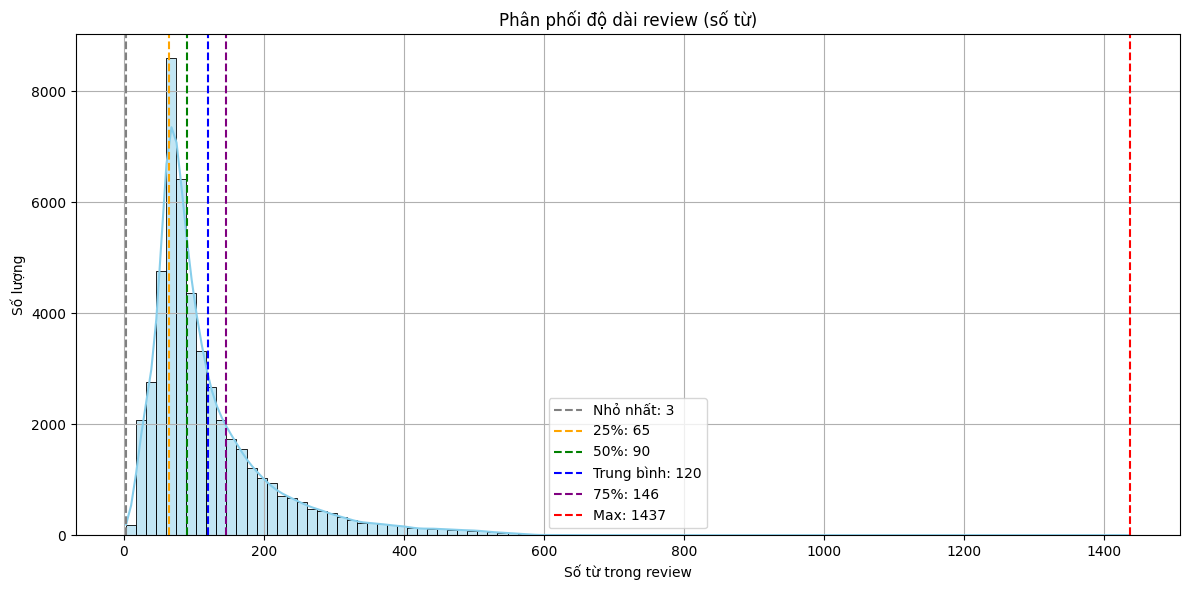

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

stats = df['review_length'].describe()

plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=100, kde=True, color='skyblue', edgecolor='black')

plt.axvline(stats['min'], color='gray', linestyle='--', label=f"Nhỏ nhất: {int(stats['min'])}")
plt.axvline(stats['mean'], color='blue', linestyle='--', label=f"Trung bình: {int(stats['mean'])}")
plt.axvline(stats['max'], color='red', linestyle='--', label=f"Max: {int(stats['max'])}")
plt.axvline(stats['25%'], color='orange', linestyle='--', label=f"25%: {int(stats['25%'])}")
plt.axvline(stats['50%'], color='green', linestyle='--', label=f"50%: {int(stats['50%'])}")
plt.axvline(stats['75%'], color='purple', linestyle='--', label=f"75%: {int(stats['75%'])}")

plt.title("Phân phối độ dài review (số từ)")
plt.xlabel("Số từ trong review")
plt.ylabel("Số lượng")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()